In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
data=pd.read_csv(r'C:\Users\91926\Downloads\Iris plants - Iris plants.csv')

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
data.Species.value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

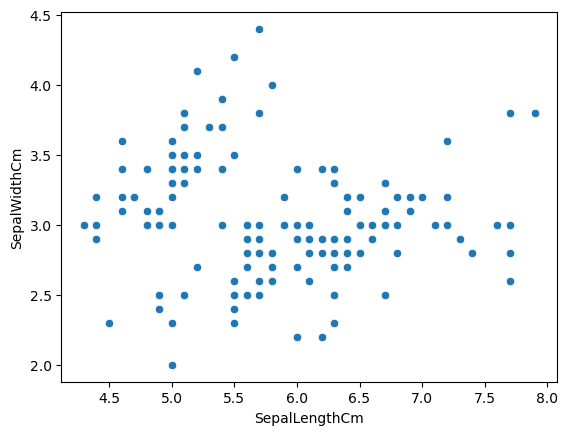

In [11]:
sns.scatterplot(data=data,x='SepalLengthCm',y='SepalWidthCm')
plt.show()

<Figure size 2000x2000 with 0 Axes>

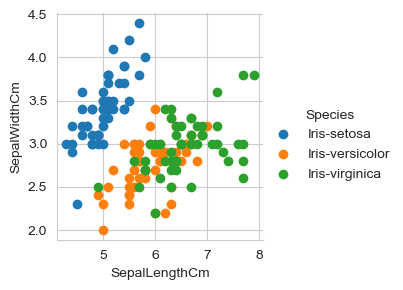

In [14]:
plt.figure(figsize=(20,20))
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Species").map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

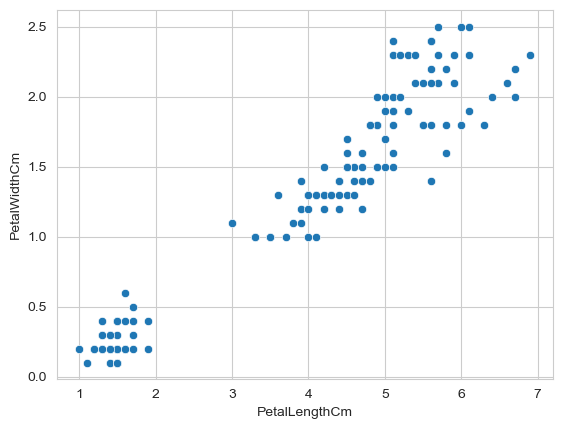

In [15]:
sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm')
plt.show()

In [16]:
data=data.drop('Id',axis=1)

In [17]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
x=data.drop('Species',axis=1)

In [20]:
y=data['Species']

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [23]:
x_standard=scaler.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_standard,y,test_size=0.33,random_state=101)

## Predicting accuracy using LogisticRegression algorithm

In [32]:
from sklearn.linear_model import LogisticRegression 

In [33]:
lr=LogisticRegression()

In [34]:
lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
predictions=lr.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test,predictions))

[[15  0  0]
 [ 0 21  1]
 [ 0  0 13]]


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.95      0.98        22
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50



In [39]:
from sklearn.metrics import accuracy_score

In [40]:
acc = accuracy_score(y_test,predictions)

In [42]:
acc=acc*100

In [43]:
acc

98.0

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

### Predicting accuracy using KNN algorithm

In [45]:
knn=KNeighborsClassifier()

In [46]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
pred=knn.predict(x_test)

In [48]:
acc=accuracy_score(y_test,predictions)*100

In [49]:
acc

98.0

### Predicting accuracy using Naive Bayes Classifier algorithm

In [50]:
nbc=GaussianNB()

In [51]:
nbc.fit(x_train,y_train)

GaussianNB()

In [52]:
pred=nbc.predict(x_test)

In [53]:
acc=accuracy_score(y_test,pred)*100

In [54]:
acc

96.0

### Predicting accuracy using Decision Tree Classifier algorithm

In [75]:
dtree=DecisionTreeClassifier()

In [76]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
pred_tree=dtree.predict(x_test)

In [78]:
acc=accuracy_score(y_test,pred_tree)*100

In [79]:
acc

96.0

### Predicting accuracy using Random Forest Classifier algorithm

In [70]:
rf=RandomForestClassifier(n_estimators=200)

In [71]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [72]:
pred=rf.predict(x_test)

In [73]:
acc=accuracy_score(y_test,pred)*100

In [74]:
acc

96.0

### Predicting accuracy using Support Vector Classifier algorithm

In [60]:
svm=SVC()

In [61]:
svm.fit(x_train,y_train)

SVC()

In [62]:
svm.predict(x_test)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor'], dtype=objec

In [63]:
acc=accuracy_score(y_test,pred)*100

In [64]:
acc

96.0

## THANKS